In [2]:
%matplotlib inline
from fredapi import Fred
fred = Fred(api_key='48602a9ca88b2b0eefabd0904eaeb6be')
#data = fred.get_series('SP500')
import pandas as pd
pd.options.display.max_colwidth = 60
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import urllib
from IPython.core.pylabtools import figsize
figsize(20, 5)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller


In [8]:
fred.get_series_info('PCEPILFE')

frequency                                                                        Monthly
frequency_short                                                                        M
id                                                                              PCEPILFE
last_updated                                                      2016-06-29 07:51:07-05
notes                        BEA Account Code: DPCCRG3  A Guide to the National Incom...
observation_end                                                               2016-05-01
observation_start                                                             1959-01-01
popularity                                                                            70
realtime_end                                                                  2016-07-07
realtime_start                                                                2016-07-07
seasonal_adjustment                                                  Seasonally Adjusted
seasonal_adjustment_s

In [9]:
fred.get_series_info('USD1MTD156N')

frequency                                                                          Daily
frequency_short                                                                        D
id                                                                           USD1MTD156N
last_updated                                                      2016-07-07 07:16:25-05
notes                        The data series is lagged by one week due to an agreemen...
observation_end                                                               2016-06-30
observation_start                                                             1986-01-02
popularity                                                                            87
realtime_end                                                                  2016-07-07
realtime_start                                                                2016-07-07
seasonal_adjustment                                              Not Seasonally Adjusted
seasonal_adjustment_s

In [23]:
# GDP
data = fred.get_series('GDP', '6/1/2014')
data.tail()

2015-01-01    17649.3
2015-04-01    17913.7
2015-07-01    18060.2
2015-10-01    18164.8
2016-01-01    18230.1
dtype: float64

In [24]:
personal_income_series = fred.search_by_release(175, limit=4, order_by='popularity', sort_order='desc')

personal_income_series['title']



series id
PCPI37063           Per Capita Personal Income in Durham County, NC
PCPI32003            Per Capita Personal Income in Clark County, NV
PCPI24031       Per Capita Personal Income in Montgomery County, MD
PCPI11001    Per Capita Personal Income in the District of Columbia
Name: title, dtype: object

In [25]:
fred.search('japan', order_by='popularity', limit=5)

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
TWEXB,"Weekly, Ending Wednesday",W,TWEXB,2016-06-27 20:41:53,Averages of daily figures. A weighted average of the for...,2016-06-22,1995-01-04,82,2016-07-03,2016-07-03,Not Seasonally Adjusted,NSA,Trade Weighted U.S. Dollar Index: Broad,Index Jan 1997=100,Index Jan 1997=100
DTWEXM,Daily,D,DTWEXM,2016-06-27 20:41:52,A weighted average of the foreign exchange value of the ...,2016-06-24,1973-01-02,78,2016-07-03,2016-07-03,Not Seasonally Adjusted,NSA,Trade Weighted U.S. Dollar Index: Major Currencies,Index Mar 1973=100,Index Mar 1973=100
EXJPUS,Monthly,M,EXJPUS,2016-06-27 20:41:55,Averages of daily figures. Noon buying rates in New York...,2016-06-01,1971-01-01,69,2016-07-03,2016-07-03,Not Seasonally Adjusted,NSA,Japan / U.S. Foreign Exchange Rate,Japanese Yen to One U.S. Dollar,Japanese Yen to 1 U.S. $
DTWEXB,Daily,D,DTWEXB,2016-06-27 20:41:50,A weighted average of the foreign exchange value of the ...,2016-06-24,1995-01-04,67,2016-07-03,2016-07-03,Not Seasonally Adjusted,NSA,Trade Weighted U.S. Dollar Index: Broad,Index Jan 1997=100,Index Jan 1997=100
DEXJPUS,Daily,D,DEXJPUS,2016-06-27 20:41:25,Noon buying rates in New York City for cable transfers p...,2016-06-24,1971-01-04,66,2016-07-03,2016-07-03,Not Seasonally Adjusted,NSA,Japan / U.S. Foreign Exchange Rate,Japanese Yen to One U.S. Dollar,Japanese Yen to 1 U.S. $


In [27]:
import urllib.request
f = urllib.request.urlopen('https://fred.stlouisfed.org/series/NIKKEI225/NIKKEI225.csv')
print(f.read(100))

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta '


In [81]:
import requests


def download_file(url, output_file, compressed=True):
    """
    compressed: enable response compression support
    """
    # NOTE the stream=True parameter. It enable a more optimized and buffer support for data loading.
    headers = {}
    if compressed:
        headers["Accept-Encoding"] = "gzip"

    r = requests.get(url, headers=headers, stream=True)

    with open(output_file, 'wb') as f: #open as block write.
        for chunk in r.iter_content(chunk_size=1024*1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
        f.flush() #Afterall, force data flush into output file (optional)

    return output_file

remote_csv = "https://fred.stlouisfed.org/series/NIKKEI225/DDOI11AGA156NWDB.xls"
local_output_file = "C:\\Users\\syc\\Downloads\\test.xls"

download_file(remote_csv, local_output_file)

#Check file content, just for test purposes:
#print(open(local_output_file).read())

'C:\\Users\\syc\\Downloads\\test.xls'

In [28]:
df = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')
df['title']

series id
TERMCBAUTO48NS    Finance Rate on Consumer Installment Loans at Commercial...
SLOAS                        Student Loans Owned and Securitized, Outstanding
TOTALSL              Total Consumer Credit Owned and Securitized, Outstanding
TERMCBCCALLNS     Commercial Bank Interest Rate on Credit Card Plans, All ...
MVLOAS                 Motor Vehicle Loans Owned and Securitized, Outstanding
TERMCBPER24NS     Finance Rate on Personal Loans at Commercial Banks, 24 M...
REVOLSL             Total Revolving Credit Owned and Securitized, Outstanding
TERMCBCCINTNS     Commercial Bank Interest Rate on Credit Card Plans, Acco...
TOTALGOV          Total Consumer Loans Owned by Federal Government, Outsta...
TERMAFCNCNSA      New Car Average Finance Rate at Auto Finance Companies (...
Name: title, dtype: object

In [30]:
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
print(df)

                 DC        NY       SF
1969-01-01   4888.0    7891.0   5921.0
1970-01-01   5469.0    8562.0   6535.0
1971-01-01   6124.0    9181.0   6977.0
1972-01-01   6710.0    9826.0   7564.0
1973-01-01   7158.0   10265.0   8037.0
1974-01-01   7904.0   11015.0   8770.0
1975-01-01   8710.0   11885.0   9745.0
1976-01-01   9407.0   12633.0  10476.0
1977-01-01  10315.0   13922.0  11500.0
1978-01-01  11180.0   15534.0  12674.0
1979-01-01  12058.0   16798.0  13957.0
1980-01-01  13090.0   18241.0  15238.0
1981-01-01  14086.0   20190.0  17015.0
1982-01-01  15087.0   21744.0  17890.0
1983-01-01  15776.0   23993.0  19241.0
1984-01-01  17208.0   25735.0  20921.0
1985-01-01  18199.0   28326.0  21709.0
1986-01-01  19010.0   30725.0  22882.0
1987-01-01  20067.0   34824.0  23861.0
1988-01-01  22274.0   41302.0  26727.0
1989-01-01  23985.0   44394.0  27987.0
1990-01-01  25731.0   50225.0  29434.0
1991-01-01  27081.0   46524.0  31084.0
1992-01-01  28764.0   51437.0  32119.0
1993-01-01  30086.0   533

In [7]:
#df = fred.search_by_country('Taiwan', limit=10, order_by='popularity', sort_order='desc')
fred.search_by_country('India', limit=5, order_by='popularity', sort_order='desc')



,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
INTGSBINM193N,Monthly,M,INTGSBINM193N,2016-03-30 14:46:12,Notes regarding this series can be found in Internationa...,2016-01-01,1957-01-01,63,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,"Interest Rates, Government Securities, Government Bonds ...",Percent per Annum,% per Annum
INTDSRINM193N,Monthly,M,INTDSRINM193N,2016-06-30 19:06:09,Notes regarding this series can be found in Internationa...,2016-03-01,1968-01-01,47,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,"Interest Rates, Discount Rate for India©",Percent per Annum,% per Annum
INDGDPNQDSMEI,Quarterly,Q,INDGDPNQDSMEI,2015-03-04 15:22:34,"Copyright, 2016, OECD. Reprinted with permission. All O...",2014-10-01,1996-04-01,41,2016-07-11,2016-07-11,Seasonally Adjusted,SA,Current Price Gross Domestic Product in India©,Billions of Indian Rupees,Bil. of Indian Rupees
MKTGDPINA646NWDB,Annual,A,MKTGDPINA646NWDB,2016-01-15 20:41:21,GDP at purchaser's prices is the sum of gross value adde...,2014-01-01,1960-01-01,38,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,Gross Domestic Product for India,Current Dollars,Current $
FPCPITOTLZGIND,Annual,A,FPCPITOTLZGIND,2016-05-20 19:01:07,Inflation as measured by the consumer price index reflec...,2015-01-01,1960-01-01,33,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,"Inflation, consumer prices for India",Percent,%


In [5]:
#df = fred.search_by_country('Taiwan', limit=10, order_by='popularity', sort_order='desc')
fred.search_by_country('Germany', limit = 3, order_by='popularity', sort_order='desc')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
IRLTLT01DEM156N,Monthly,M,IRLTLT01DEM156N,2015-06-08 19:10:30,OECD descriptor ID: IRLTLT01 OECD unit ID: ST OECD count...,2015-03-01,1956-05-01,66,2016-07-10,2016-07-10,Not Seasonally Adjusted,NSA,Long-Term Government Bond Yields: 10-year: Main (Includi...,Percent,%
INTGSBDEM193N,Monthly,M,INTGSBDEM193N,2016-06-30 19:06:10,Notes regarding this series can be found in Internationa...,2016-05-01,1957-01-01,47,2016-07-10,2016-07-10,Not Seasonally Adjusted,NSA,"Interest Rates, Government Securities, Government Bonds ...",Percent per Annum,% per Annum
DEUCPIALLMINMEI,Monthly,M,DEUCPIALLMINMEI,2015-06-08 19:12:50,"Copyright, 2016, OECD. Reprinted with permission. All O...",2015-03-01,1955-01-01,42,2016-07-10,2016-07-10,Not Seasonally Adjusted,NSA,Consumer Price Index of All Items in Germany©,Index 2010=100,Index 2010=100


In [10]:
print(fred.get_series('LFAC24TTDEA647N'))

2005-01-01    4800700.0
2006-01-01    4843375.0
2007-01-01    4920175.0
2008-01-01    4897950.0
2009-01-01    4780325.0
2010-01-01    4639750.0
2011-01-01    4563000.0
2012-01-01    4381700.0
2013-01-01    4340975.0
2014-01-01    4227675.0
dtype: float64


In [8]:
#df = fred.search_by_country('Taiwan', limit=10, order_by='popularity', sort_order='desc')
fred.search_by_state('NV', limit = 10, order_by='last_updated', sort_order='desc')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
NVCCLAIMS,"Weekly, Ending Saturday",W,NVCCLAIMS,2016-07-07 13:41:27,None,2016-06-18,1986-02-01,0,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,Continued Claims (Insured Unemployment) in Nevada,Number,Number
NVCEMPLOY,"Weekly, Ending Saturday",W,NVCEMPLOY,2016-07-07 13:41:26,None,2016-06-18,1986-02-01,0,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,Covered Employment in Nevada,Number,Number
NVICLAIMS,"Weekly, Ending Saturday",W,NVICLAIMS,2016-07-07 13:41:26,None,2016-06-25,1986-02-08,7,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,Initial Claims in Nevada,Number,Number
NVINSUREDUR,"Weekly, Ending Saturday",W,NVINSUREDUR,2016-07-07 13:41:26,None,2016-06-18,1986-02-01,0,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,Insured Unemployment Rate in Nevada,Percent,%
NVNAN,Monthly,M,NVNAN,2016-07-06 15:25:27,None,2016-05-01,1939-01-01,0,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,All Employees: Total Nonfarm in Nevada,Thousands of Persons,Thous. of Persons
NVPBSV,Monthly,M,NVPBSV,2016-07-06 15:25:27,None,2016-05-01,1990-01-01,0,2016-07-11,2016-07-11,Seasonally Adjusted,SA,All Employees: Professional and Business Services in Nevada,Thousands of Persons,Thous. of Persons
NVPBSVN,Monthly,M,NVPBSVN,2016-07-06 15:25:27,None,2016-05-01,1990-01-01,0,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,All Employees: Professional and Business Services in Nevada,Thousands of Persons,Thous. of Persons
SMU32000006000000011SA,Monthly,M,SMU32000006000000011SA,2016-07-02 00:02:33,The Federal Reserve Bank of St. Louis seasonally adjusts...,2016-05-01,2007-01-01,0,2016-07-11,2016-07-11,Seasonally Adjusted,SA,Average Weekly Earnings of All Employees: Professional a...,Dollars per Week,$ per Week
SMU32000006054000001,Monthly,M,SMU32000006054000001,2016-07-02 00:02:33,None,2016-05-01,1990-01-01,0,2016-07-11,2016-07-11,Not Seasonally Adjusted,NSA,"All Employees: Professional, Scientific, and Technical S...",Thousands of Persons,Thous. of Persons


In [2]:
a = fred.get_series('SMU53000000600000002')
#print(a)
b = a.values
plt.plot(b)
plt.ylabel('some numbers')
plt.show()
print(b.shape)

(113,)


In [3]:
fred.search('Germany', limit = 5, order_by='popularity', sort_order='desc')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
IRLTLT01DEM156N,Monthly,M,IRLTLT01DEM156N,2015-06-08 19:10:30,OECD descriptor ID: IRLTLT01 OECD unit ID: ST OECD count...,2015-03-01,1956-05-01,65,2016-07-07,2016-07-07,Not Seasonally Adjusted,NSA,Long-Term Government Bond Yields: 10-year: Main (Includi...,Percent,%
CLVMNACSCAB1GQDE,Quarterly,Q,CLVMNACSCAB1GQDE,2016-04-08 19:46:38,Eurostat unit ID: CLV10_MNAC Eurostat item ID = B1GQ Eur...,2015-10-01,1991-01-01,48,2016-07-07,2016-07-07,Seasonally Adjusted,SA,Real Gross Domestic Product for Germany©,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros
CLVMEURSCAB1GQEA19,Quarterly,Q,CLVMEURSCAB1GQEA19,2016-05-13 15:11:05,Eurostat unit ID: CLV10_MEUR Eurostat item ID = B1GQ Eur...,2016-01-01,1995-01-01,48,2016-07-07,2016-07-07,Seasonally Adjusted,SA,Real Gross Domestic Product (Euro/ECU series) for Euro a...,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros
INTGSBDEM193N,Monthly,M,INTGSBDEM193N,2016-06-30 19:06:10,Notes regarding this series can be found in Internationa...,2016-05-01,1957-01-01,46,2016-07-07,2016-07-07,Not Seasonally Adjusted,NSA,"Interest Rates, Government Securities, Government Bonds ...",Percent per Annum,% per Annum
EUEPUINDXM,Monthly,M,EUEPUINDXM,2016-07-01 15:21:06,"News-based index for 5 European economies (Germany, the ...",2016-06-01,1987-01-01,44,2016-07-07,2016-07-07,Not Seasonally Adjusted,NSA,Economic Policy Uncertainty Index for Europe,Index,Index


In [5]:
fred.search_by_country('Germany', limit=3, order_by='popularity', sort_order='asc')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
LFAC24TTDEA647N,Annual,A,LFAC24TTDEA647N,2015-04-03 16:36:19,OECD descriptor ID: LFAC24TT OECD unit ID: ST OECD count...,2014-01-01,2005-01-01,0,2016-07-07,2016-07-07,Not Seasonally Adjusted,NSA,Active Population: Aged 15-24: All Persons for Germany©,Persons,Persons
LFAC24TTDEQ647N,Quarterly,Q,LFAC24TTDEQ647N,2015-04-03 16:36:18,OECD descriptor ID: LFAC24TT OECD unit ID: ST OECD count...,2014-10-01,1999-04-01,0,2016-07-07,2016-07-07,Not Seasonally Adjusted,NSA,Active Population: Aged 15-24: All Persons for Germany©,Persons,Persons
LFAC24TTDEQ647S,Quarterly,Q,LFAC24TTDEQ647S,2015-04-03 16:36:18,OECD descriptor ID: LFAC24TT OECD unit ID: STSA OECD cou...,2014-10-01,2005-01-01,0,2016-07-07,2016-07-07,Seasonally Adjusted,SA,Active Population: Aged 15-24: All Persons for Germany©,Persons,Persons


In [4]:
print(fred.get_series('LFAC24TTDEQ647N'))
x = fred.get_series('LFAC24TTDEQ647N')

1999-04-01    4453600.0
1999-07-01          NaN
1999-10-01          NaN
2000-01-01          NaN
2000-04-01    4471500.0
2000-07-01          NaN
2000-10-01          NaN
2001-01-01          NaN
2001-04-01    4480700.0
2001-07-01          NaN
2001-10-01          NaN
2002-01-01          NaN
2002-04-01    4500100.0
2002-07-01          NaN
2002-10-01          NaN
2003-01-01          NaN
2003-04-01    4487700.0
2003-07-01          NaN
2003-10-01          NaN
2004-01-01          NaN
2004-04-01    4386700.0
2004-07-01          NaN
2004-10-01          NaN
2005-01-01    4780700.0
2005-04-01    4677900.0
2005-07-01    4871300.0
2005-10-01    4872900.0
2006-01-01    4834400.0
2006-04-01    4788600.0
2006-07-01    4874500.0
                ...    
2007-07-01    4972900.0
2007-10-01    4983900.0
2008-01-01    5006000.0
2008-04-01    4794400.0
2008-07-01    4922800.0
2008-10-01    4868600.0
2009-01-01    4856100.0
2009-04-01    4706800.0
2009-07-01    4791200.0
2009-10-01    4767200.0
2010-01-01    46

In [5]:
x = x[np.logical_not(np.isnan(x))]
print(x)

1999-04-01    4453600.0
2000-04-01    4471500.0
2001-04-01    4480700.0
2002-04-01    4500100.0
2003-04-01    4487700.0
2004-04-01    4386700.0
2005-01-01    4780700.0
2005-04-01    4677900.0
2005-07-01    4871300.0
2005-10-01    4872900.0
2006-01-01    4834400.0
2006-04-01    4788600.0
2006-07-01    4874500.0
2006-10-01    4876000.0
2007-01-01    4925800.0
2007-04-01    4798100.0
2007-07-01    4972900.0
2007-10-01    4983900.0
2008-01-01    5006000.0
2008-04-01    4794400.0
2008-07-01    4922800.0
2008-10-01    4868600.0
2009-01-01    4856100.0
2009-04-01    4706800.0
2009-07-01    4791200.0
2009-10-01    4767200.0
2010-01-01    4689200.0
2010-04-01    4490200.0
2010-07-01    4697700.0
2010-10-01    4681900.0
2011-01-01    4495600.0
2011-04-01    4511900.0
2011-07-01    4632700.0
2011-10-01    4611800.0
2012-01-01    4390700.0
2012-04-01    4308700.0
2012-07-01    4425300.0
2012-10-01    4402100.0
2013-01-01    4398900.0
2013-04-01    4267100.0
2013-07-01    4382900.0
2013-10-01    43

In [6]:
fred.search_by_country('Germany', limit=3, order_by='popularity', sort_order='desc')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
IRLTLT01DEM156N,Monthly,M,IRLTLT01DEM156N,2015-06-08 19:10:30,OECD descriptor ID: IRLTLT01 OECD unit ID: ST OECD count...,2015-03-01,1956-05-01,65,2016-07-08,2016-07-08,Not Seasonally Adjusted,NSA,Long-Term Government Bond Yields: 10-year: Main (Includi...,Percent,%
INTGSBDEM193N,Monthly,M,INTGSBDEM193N,2016-06-30 19:06:10,Notes regarding this series can be found in Internationa...,2016-05-01,1957-01-01,46,2016-07-08,2016-07-08,Not Seasonally Adjusted,NSA,"Interest Rates, Government Securities, Government Bonds ...",Percent per Annum,% per Annum
DEUCPIALLMINMEI,Monthly,M,DEUCPIALLMINMEI,2015-06-08 19:12:50,"Copyright, 2016, OECD. Reprinted with permission. All O...",2015-03-01,1955-01-01,42,2016-07-08,2016-07-08,Not Seasonally Adjusted,NSA,Consumer Price Index of All Items in Germany©,Index 2010=100,Index 2010=100


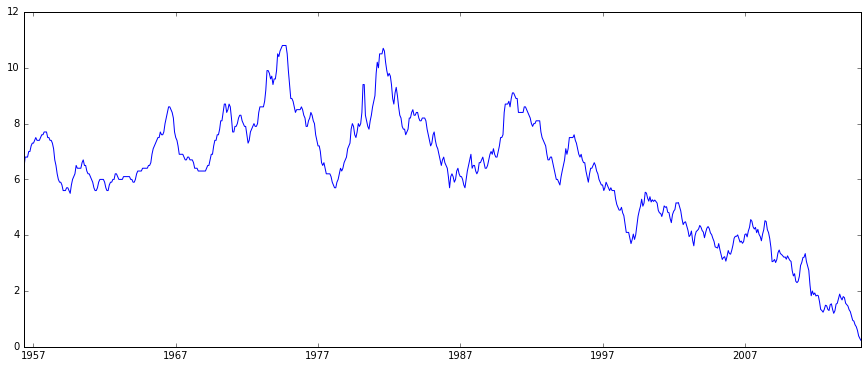

In [2]:
y = fred.get_series('IRLTLT01DEM156N')
plt.plot(y)

In [3]:
print(y.head())
print(y.index)

1956-05-01    6.4
1956-06-01    6.8
1956-07-01    6.8
1956-08-01    6.8
1956-09-01    7.0
dtype: float64
DatetimeIndex(['1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01', '1956-11-01', '1956-12-01',
               '1957-01-01', '1957-02-01',
               ...
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01'],
              dtype='datetime64[ns]', length=707, freq=None)


C:\Users\syc\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\syc\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


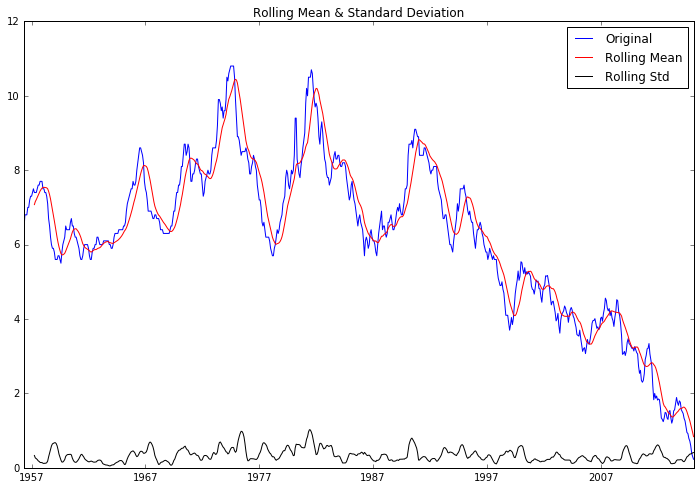

Results of Dickey-Fuller Test:
Test Statistic                  -0.767407
p-value                          0.828509
#Lags Used                       3.000000
Number of Observations Used    703.000000
Critical Value (1%)             -3.439686
Critical Value (10%)            -2.568964
Critical Value (5%)             -2.865660
dtype: float64


In [5]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 
    
test_stationarity(y)    

In [17]:
from statsmodels import tsa as tsa
p = 3
d = 1
q = 3
temp = tsa.arima_model.ARIMA(y, [p, d, q])
model = temp.fit(trend='c' , disp = False)
model.predict()

C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


1956-06-01   -0.008492
1956-07-01    0.143225
1956-08-01   -0.046584
1956-09-01    0.035377
1956-10-01    0.080119
1956-11-01   -0.041262
1956-12-01    0.080443
1957-01-01    0.001926
1957-02-01    0.006767
1957-03-01    0.054222
1957-04-01    0.024782
1957-05-01   -0.062215
1957-06-01    0.005611
1957-07-01   -0.019062
1957-08-01    0.039353
1957-09-01    0.028024
1957-10-01   -0.002732
1957-11-01    0.047262
1957-12-01   -0.023982
1958-01-01   -0.004552
1958-02-01   -0.094576
1958-03-01    0.023354
1958-04-01   -0.064429
1958-05-01    0.009751
1958-06-01   -0.056430
1958-07-01   -0.070539
1958-08-01   -0.151968
1958-09-01   -0.053632
1958-10-01   -0.147614
1958-11-01   -0.069765
                ...   
2012-10-01    0.048072
2012-11-01   -0.017575
2012-12-01   -0.043695
2013-01-01   -0.012903
2013-02-01    0.063553
2013-03-01   -0.033548
2013-04-01   -0.061762
2013-05-01   -0.022248
2013-06-01    0.041123
2013-07-01    0.052594
2013-08-01   -0.033966
2013-09-01    0.088733
2013-10-01 

In [8]:
def average(series):
    return float(sum(series))/len(series)

def moving_average(series, n):
    return average(series[-n:])


print(average(y))

print(moving_average(y, 4))

6.200495049504962
0.3775
